In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import math
import operator
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

1a. Implementation of Linear Regression for functional depths 0,1,2,3,4,5,6

In [2]:
# function to get the phi(x_training_data) --> the formula given in the question and k =6 value from the data generator
# d - functional depth 
def hypothesis_function(x_train, d):
    k = 6
    x_train=x_train.astype('float64')
    n = len(x_train)
    #print(n)
    theta_no = [0] *( 2 * d + 2)
    phi = np.zeros( (n, len(theta_no)) )
    #phi=phi.astype('float64')
    #print(phi.shape)
    phi[:,0] = 1
    phi[:,1] = x_train 
    for i in range(1,d+1):
        for j in range(0,n):
            phi[j,2*i] = pow(math.sin(i * k * x_train[j]),(i*k))* (math.cos(x_train[j]))
            phi[j,2*i+1] = pow(math.cos(i * k * x_train[j]),(i*k)) * (math.sin(x_train[j]))
    #print(phi)
    #phi=phi.astype('float64')
    return phi

In [3]:
# this function returns theta value with takes input - phi value and  y_trianing data 
# analytic Optimization formula
def equation_function(phi_v, y_value):
    phi_pinverse = np.linalg.pinv(phi_v)
    theta_value = np.dot(phi_pinverse, y_value)
    return theta_value

In [4]:
# the prediction of the training data points h(x)= theta * phi value
# return the prediction value
def predict_function(feature_matrix, theta_value):
    prediction= np.dot(feature_matrix, theta_value)
    return prediction

In [5]:
# gives the error between the predicted value and actual value 
# ignoring the (1/2) in the error formula
def error(y_value, y_pred):
    y_value=y_value.astype('float64')
    y_pred=y_pred.astype('float64')
    error_value = ((y_prediction - y_t).T @ (y_prediction - y_t))/2
    return error_value

1b. Applying the Linear Regression on the training data with different functional depths 0,1,2,3,4,5,6 and plotting the graph

In [6]:
# I have used my google drive to load the training and testing data
# Upload the dataset file in your google drive and change the path to run the below line
from google.colab import drive
drive.mount('/content/drive')
train_data= pd.read_csv('/content/drive/MyDrive/ML/proj1btrainingdatacsv.csv',dtype='object')
print(train_data)

Mounted at /content/drive
             x                    y
0     -1.8595     -2.9157602212752 
1     -0.4045      1.5789283980163 
2      2.4085      11.132203673407 
3      -1.764     -2.4681520321457 
4       0.274      3.9107990113579 
..         ...                  ...
120    0.3105      4.2639106552876 
121    1.4255      8.1198814216973 
122   -1.0735    -0.54575209222805 
123     1.385      8.0268599849653 
124    0.5895      4.5934941677497 

[125 rows x 2 columns]


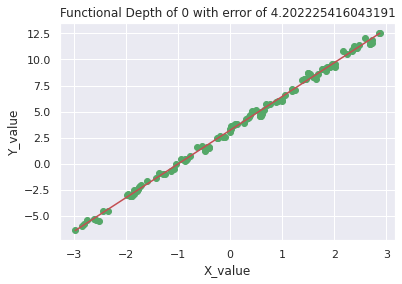

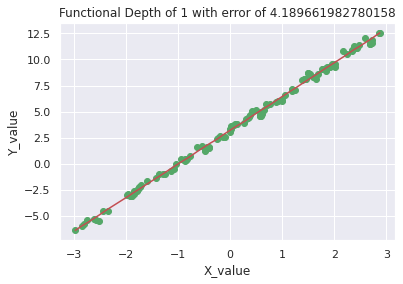

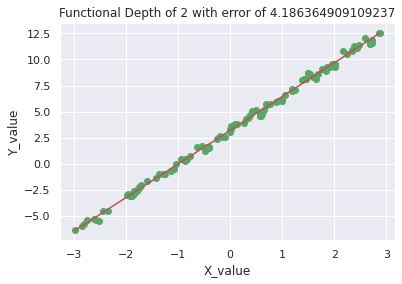

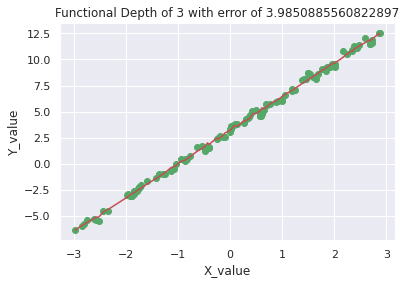

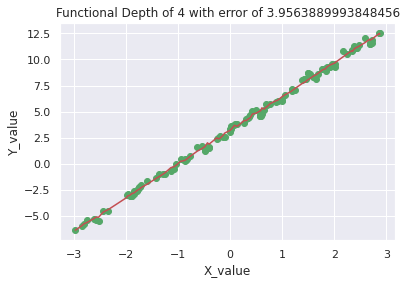

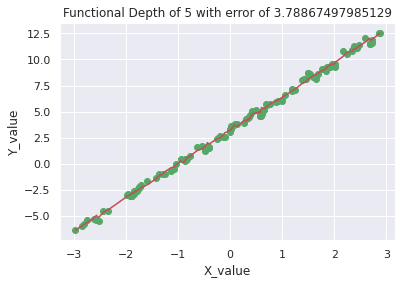

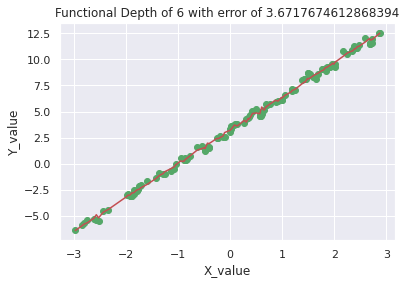

In [7]:
# using the training data to implement the linear regression for function depth 0 to 6
# step1: loading the data
# step 2: sending the X_Training data and function depth value to fetch phi value
#  step 3: generate the theta value by calling the equation function 
# step 4: predict the output by using h(x)= phi * theta
# step 5: calculating the error value
# plotting the graph for each with the error value
theta = []
error= []
for i in range(7):
    train_data= pd.read_csv('/content/drive/MyDrive/ML/proj1btrainingdatacsv.csv',dtype='object')
    x_train_data = train_data.iloc[:,0]
    y_train_data = train_data.iloc[:,1]
    x_t = x_train_data.values
    y_t = y_train_data.values
    y_t=y_t.astype('float64')
    x_t=x_t.astype('float64')
    phi_value = hypothesis_function(x_t, i)
    theta.append(equation_function(phi_value, y_t))
    y_prediction = predict_function(phi_value, theta[i])
    error.append((np.sum((y_prediction - y_t) ** 2))/2)
    plt.scatter(x_t, y_t, color='g')
    axis = operator.itemgetter(0)
    axis_zip = sorted(zip(x_t,y_prediction), key=axis)
    x_t, y_pred = zip(*axis_zip)
    plt.plot(x_t, y_pred, color='r')
    plt.title(f'Functional Depth of {i} with error of {error[i]}')
    plt.xlabel('X_value')
    plt.ylabel('Y_value')
    plt.show()

In [8]:
print(theta[0])

[3.21069804 3.23787918]


1c. Applying Linear Regression for test data for different functional depths 0,1,2,3,4,5,6 and plotting graph with error

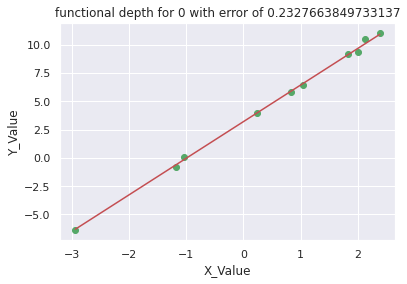

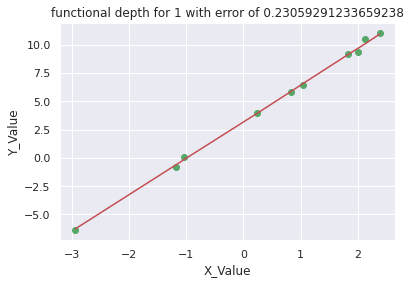

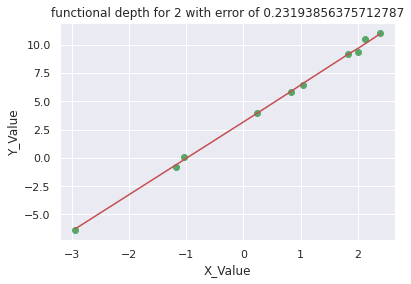

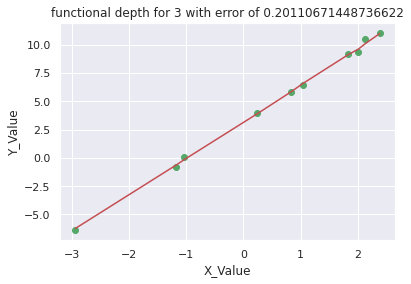

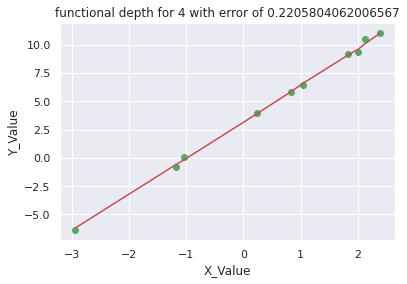

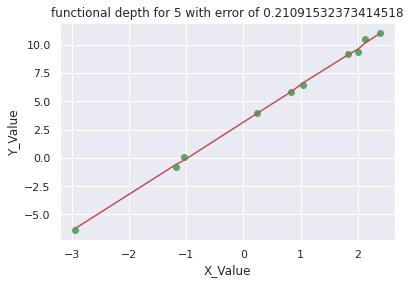

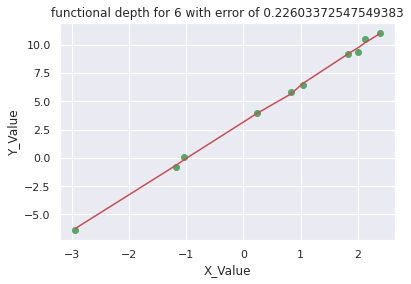

In [9]:
#using the test data to test the linear regression for function depth 0 to 6
# step1: loading the data
# step 2: sending the X_test data and function depth value to fetch phi value
#  step 3: generate the theta value by calling the equation function 
# step 4: predict the output by using h(x)= phi * theta
# step 5: calculating the error value
# plotting the graph for each with the error value
error1 =[]
for i in range(7):
    test_data = pd.read_csv('/content/drive/MyDrive/ML/testdatapro.csv',dtype='object')
    x_test_data = test_data.iloc[:,0]
    y_test_data = test_data.iloc[:,1]
    x_test_data = x_test_data.values
    y_test_data = y_test_data.values
    y_test_data = y_test_data.astype('float64')
    x_test_data = x_test_data.astype('float64')
    phi_value1 = hypothesis_function(x_test_data, i)
    y_prediction1 = predict_function(phi_value1, theta[i])
    error1.append((np.sum((y_prediction1 - y_test_data) ** 2))/2)
    plt.scatter(x_test_data, y_test_data, color ='g')
    axis1 = operator.itemgetter(0)
    axis_zip1 = sorted(zip(x_test_data,y_prediction1), key=axis1)
    x_test_data, y_pred1 = zip(*axis_zip1)
    plt.plot(x_test_data, y_pred1, color='r')
    plt.title(f'functional depth for {i} with error of {error1[i]}')
    plt.xlabel('X_Value')
    plt.ylabel('Y_Value')
    plt.show()


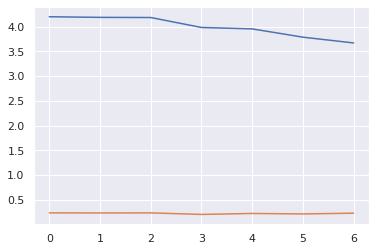

In [10]:
plt.plot(error)
plt.plot(error1) 

I think for the function depth 3, the error is 0.2011 which is less compared to all the other functional depths, Hence it is the best prediction function.

For all the other functional depth the error is comparetively high

The overfitting predictions are those with the functional depth of 4, 5, 6 because the error increases and from the graph we can also see that line is getting overfitted